# Regressão Polinomial

In [1]:
import scipy.io as spio
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

from aprendizado_maquina import regressao_linear as rl
%matplotlib inline

In [2]:
data = spio.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
y = data['y']
X = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

print('X_train:', X.shape)
print('y_train:', y.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


## Aplicando a tranformação polinomial 

In [128]:
def mapearCaracteristicas(c1, grau_polinomio):
    m = c1.shape[0]    
    data = np.ones((m,grau_polinomio+1))
    for i in range(m):
        for j in range(0, grau_polinomio+1):
            data[i,j] = np.power(c1[i,1], j)
    return data

### Dados Originais

In [45]:
original_x = pd.DataFrame(data=X, columns=["Ones", "X"])
original_x.head()

,Ones,X
0,1.0,-15.936758
1,1.0,-29.152979
2,1.0,36.189549
3,1.0,37.492187
4,1.0,-48.058829


### Dados Alterados

In [127]:
grau = 8
polinomio = mapearCaracteristicas(X, grau)

colunas = ["Ones"]
for i in range(1, grau+1):
    colunas.append("x" + str(i))

x_transformado = pd.DataFrame(polinomio, columns=indices)
x_transformado.head()

,Ones,x1,x2,x3,x4,x5,x6,x7,x8
0,1.0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,1.0,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,1.0,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12
3,1.0,37.492187,1405.664111,52701.422173,1.975892e+06,7.408050e+07,2.777440e+09,1.041323e+11,3.904148e+12
4,1.0,-48.058829,2309.651088,-110999.127750,5.334488e+06,-2.563693e+08,1.232081e+10,-5.921235e+11,2.845676e+13


## Gerando o gráfico

In [7]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y)

plot_x = np.linspace(-60,45)

#Usando o coeficientes para calcular y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

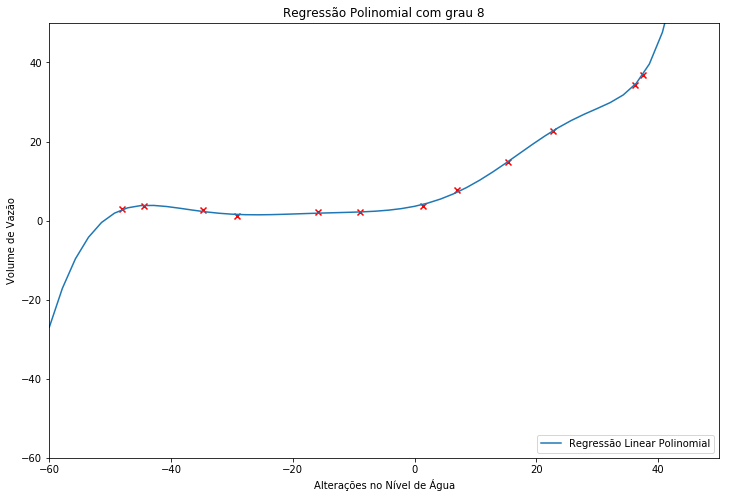

In [139]:
fig, ax = plt.subplots(figsize=(12,8)) 

ax.set_title('Regressão Polinomial com grau 8')

ax.plot(plot_x, plot_y, label='Regressão Linear Polinomial')
ax.set_xlabel("Alterações no Nível de Água")  
ax.set_ylabel('Volume de Vazão')
ax.scatter(X[:,1], y, marker='x', c='r')
ax.set_ylim(ymin=-60, ymax=50)
ax.set_xlim(xmin=-60, xmax=50)
ax.legend(loc=4)